**IMPORTING LIBRARIES**

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
import matplotlib.pyplot as plt

**MOUNTING DRIVE AND LOADING DATA SET**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
data =pd.read_csv('IoT Network Intrusion Dataset.csv')
data

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,192.168.0.24-210.89.164.90-56112-8043-17,192.168.0.24,56112,210.89.164.90,8043,17,25/07/2019 03:25:00 AM,277,1,1,...,0.0,0.0,0.0,277.0,0.000000,277.0,277.0,Anomaly,Mirai,Mirai-UDP Flooding
625779,192.168.0.13-222.131.171.244-554-4570-6,222.131.171.244,4570,192.168.0.13,554,6,26/05/2019 10:06:51 PM,1658,0,2,...,0.0,0.0,0.0,1658.0,0.000000,1658.0,1658.0,Anomaly,DoS,DoS-Synflooding
625780,192.168.0.13-192.168.0.16-9020-52739-6,192.168.0.16,52739,192.168.0.13,9020,6,11/07/2019 01:29:09 AM,77,1,1,...,0.0,0.0,0.0,77.0,0.000000,77.0,77.0,Anomaly,Scan,Scan Port OS
625781,192.168.0.13-192.168.0.16-9020-49784-6,192.168.0.13,9020,192.168.0.16,49784,6,20/05/2019 05:00:29 AM,240,2,1,...,0.0,0.0,0.0,120.0,7.071068,125.0,115.0,Normal,Normal,Normal


**PREPROCESSING AND CLEANING DATA**

In [3]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep]
data=clean_dataset(data)
data = data.to_numpy()

**LABEL ENCODING**

In [4]:
np.random.shuffle(data) 
X=data[:,7:83]
Y=data[:,83]
Y[Y=='Anomaly']=0
Y[Y=='Normal']=1
minMax= MinMaxScaler()
X = minMax.fit_transform(X)
std = StandardScaler()
X = std.fit_transform(X)

**SPLITING DATA**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

**MODEL**

In [9]:
model = Sequential(
    [
     Dense(32,activation='relu',input_shape=X_train.shape, kernel_initializer='random_normal'),
     Dense(32,activation='relu', kernel_initializer='random_normal'),
     Dense(32,activation='relu', kernel_initializer='random_normal'),
     Dense(1,activation='sigmoid', kernel_initializer='random_normal'),
    ]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 419028, 32)        2464      
_________________________________________________________________
dense_5 (Dense)              (None, 419028, 32)        1056      
_________________________________________________________________
dense_6 (Dense)              (None, 419028, 32)        1056      
_________________________________________________________________
dense_7 (Dense)              (None, 419028, 1)         33        
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential(
    [
     Dense(32,activation='relu',input_shape=X_train.shape, kernel_initializer='random_normal'),
     Dense(32,activation='relu', kernel_initializer='random_normal'),
     Dense(32,activation='relu', kernel_initializer='random_normal'),
     Dense(1,activation='sigmoid', kernel_initializer='random_normal'),
    ]
)
model.summary()

**COMPILING AND TRAINING MODEL**

In [10]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
X_train = tf.convert_to_tensor(X_train,np.float32)
y_train = tf.convert_to_tensor(y_train,np.float32)
print(X_train.shape)
print(y_train.shape)
history=model.fit(X_train, y_train,epochs=10, batch_size=50)

(419028, 76)
(419028,)
Epoch 1/10
8381/8381 [==============================] - 15s 2ms/step - loss: 0.0690 - accuracy: 0.9799
Epoch 2/10
8381/8381 [==============================] - 16s 2ms/step - loss: 0.0482 - accuracy: 0.9857
Epoch 3/10
8381/8381 [==============================] - 15s 2ms/step - loss: 0.0453 - accuracy: 0.9861
Epoch 4/10
8381/8381 [==============================] - 15s 2ms/step - loss: 0.0441 - accuracy: 0.9864
Epoch 5/10
8381/8381 [==============================] - 16s 2ms/step - loss: 0.0431 - accuracy: 0.9866
Epoch 6/10
8381/8381 [==============================] - 15s 2ms/step - loss: 0.0423 - accuracy: 0.9869
Epoch 7/10
8381/8381 [==============================] - 16s 2ms/step - loss: 0.0416 - accuracy: 0.9871
Epoch 8/10
8381/8381 [==============================] - 16s 2ms/step - loss: 0.0414 - accuracy: 0.9871
Epoch 9/10
8381/8381 [==============================] - 16s 2ms/step - loss: 0.0408 - accuracy: 0.9873
Epoch 10/10
8381/8381 [===========================

**EVALUTATING MODEL**

In [11]:
loss,accuracy = model.evaluate(tf.convert_to_tensor(X_test,np.float32),tf.convert_to_tensor(y_test,np.float32))
print("Loss: ", loss)
print('Accuracy: ',accuracy*100)

6450/6450 [==============================] - 9s 1ms/step - loss: 0.0383 - accuracy: 0.9879
Loss:  0.03829992190003395
Accuracy:  98.79013895988464


**Visualizing Evaluation**

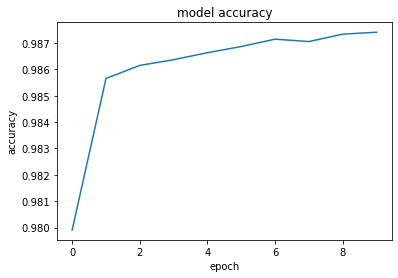

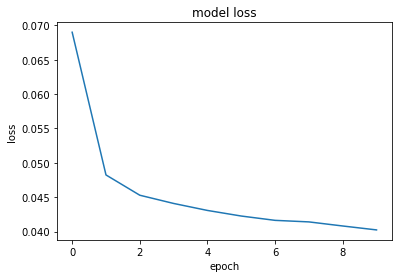

In [12]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()